Name : Suvadip Chakraborty , M24CSA032

Libraries

In [38]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

Quantization of Input Data

In [58]:
def quantize_data(data, bits):
    levels = 2 ** bits
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    quantized_data = np.round(((data - min_val) / (max_val - min_val)) * (levels - 1))
    quantized_data = (quantized_data * (max_val - min_val) / (levels - 1)) + min_val
    return quantized_data
data = datasets.load_breast_cancer().data
data_8bit = quantize_data(data, 8)
data_4bit = quantize_data(data, 4)
data_2bit = quantize_data(data, 2)

Training and Evaluation with Quantized Data (Cross-Validation)

In [59]:
def cross_validate_model(model, X, y):
    skf = StratifiedKFold(n_splits=5)
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    return np.mean(scores), np.std(scores)
X = data_8bit
y = datasets.load_breast_cancer().target

# Decision Tree
tree = DecisionTreeClassifier()
tree_mean, tree_std = cross_validate_model(tree, X, y)

# k-NN
knn = KNeighborsClassifier()
knn_mean, knn_std = cross_validate_model(knn, X, y)

# SVM
svm = SVC()
svm_mean, svm_std = cross_validate_model(svm, X, y)

print(f"Decision Tree: Mean Accuracy = {tree_mean}, Std = {tree_std}")
print(f"k-NN: Mean Accuracy = {knn_mean}, Std = {knn_std}")
print(f"SVM: Mean Accuracy = {svm_mean}, Std = {svm_std}")


Decision Tree: Mean Accuracy = 0.9296848315478963, Std = 0.01846876312135676
k-NN: Mean Accuracy = 0.9296848315478963, Std = 0.024861687824483964
SVM: Mean Accuracy = 0.9086632510479739, Std = 0.03938231745642483


Comparison with Full-Precision Models

In [62]:
X_full_precision = datasets.load_breast_cancer().data
tree_full_mean, tree_full_std = cross_validate_model(tree, X_full_precision, y)
knn_full_mean, knn_full_std = cross_validate_model(knn, X_full_precision, y)
svm_full_mean, svm_full_std = cross_validate_model(svm, X_full_precision, y)
print(f"Decision Tree Full Precision: Mean Accuracy = {tree_full_mean}, Std = {tree_full_std}")
print(f"k-NN Full Precision: Mean Accuracy = {knn_full_mean}, Std = {knn_full_std}")
print(f"SVM Full Precision: Mean Accuracy = {svm_full_mean}, Std = {svm_full_std}")

Decision Tree Full Precision: Mean Accuracy = 0.9173730787144851, Std = 0.01641972426994943
k-NN Full Precision: Mean Accuracy = 0.9279459711224964, Std = 0.02176276406544814
SVM Full Precision: Mean Accuracy = 0.9121720229777983, Std = 0.03544367440584207


Impact Analysis


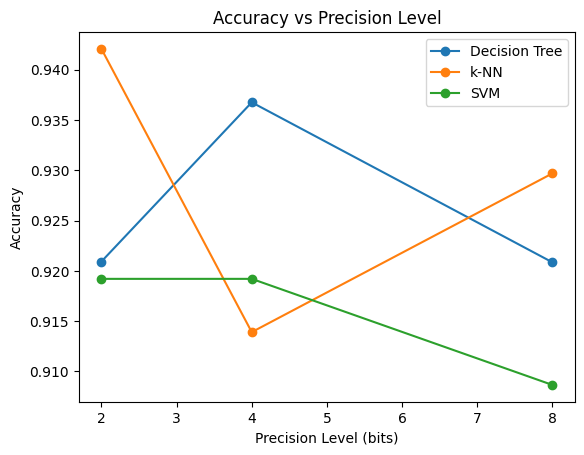

In [69]:
X_8bit = quantize_data(datasets.load_breast_cancer().data, 8)
tree_mean_8bit, tree_std_8bit = cross_validate_model(tree, X_8bit, y)
knn_mean_8bit, knn_std_8bit = cross_validate_model(knn, X_8bit, y)
svm_mean_8bit, svm_std_8bit = cross_validate_model(svm, X_8bit, y)
X_4bit = quantize_data(datasets.load_breast_cancer().data, 4)
tree_mean_4bit, tree_std_4bit = cross_validate_model(tree, X_4bit, y)
knn_mean_4bit, knn_std_4bit = cross_validate_model(knn, X_4bit, y)
svm_mean_4bit, svm_std_4bit = cross_validate_model(svm, X_4bit, y)
X_2bit = quantize_data(datasets.load_breast_cancer().data, 2)
tree_mean_2bit, tree_std_2bit = cross_validate_model(tree, X_2bit, y)
knn_mean_2bit, knn_std_2bit = cross_validate_model(knn, X_2bit, y)
svm_mean_2bit, svm_std_2bit = cross_validate_model(svm, X_2bit, y)
precision_levels = [8, 4, 2]
decision_tree_accuracies = [tree_mean_8bit, tree_mean_4bit, tree_mean_2bit]
knn_accuracies = [knn_mean_8bit, knn_mean_4bit, knn_mean_2bit]
svm_accuracies = [svm_mean_8bit, svm_mean_4bit, svm_mean_2bit]
plt.plot(precision_levels, decision_tree_accuracies, marker='o', label='Decision Tree')
plt.plot(precision_levels, knn_accuracies, marker='o', label='k-NN')
plt.plot(precision_levels, svm_accuracies, marker='o', label='SVM')
plt.xlabel('Precision Level (bits)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Precision Level')
plt.legend()
plt.show()

Logistic Regression with Quantized Gradient

In [64]:
def quantize_gradient(gradient, bits):
    levels = 2 ** bits
    min_val = np.min(gradient)
    max_val = np.max(gradient)
    quantized_gradient = np.round(((gradient - min_val) / (max_val - min_val)) * (levels - 1))
    quantized_gradient = (quantized_gradient * (max_val - min_val) / (levels - 1)) + min_val
    return quantized_gradient

In [65]:
from sklearn.datasets import load_breast_cancer
class QuantizedLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, bits=8):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.bits = bits
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        self.bias = 0
        
        for epoch in range(self.epochs):
            for i in range(len(X)):
                linear_model = np.dot(X[i], self.theta) + self.bias
                y_pred = self.sigmoid(linear_model)
                error = y_pred - y[i]
                gradient_w = X[i] * error
                gradient_b = error
                quantized_gradient_w = quantize_gradient(gradient_w, self.bits)
                quantized_gradient_b = quantize_gradient(np.array([gradient_b]), self.bits)[0]
                self.theta -= self.learning_rate * quantized_gradient_w
                self.bias -= self.learning_rate * quantized_gradient_b
    def predict(self, X):
        linear_model = np.dot(X, self.theta) + self.bias
        y_pred = self.sigmoid(linear_model)
        return np.where(y_pred > 0.5, 1, 0)
data = load_breast_cancer()
X = data.data[data.target != 2]
y = data.target[data.target != 2]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_8bit = QuantizedLogisticRegression(learning_rate=0.01, epochs=1000, bits=8)
model_8bit.fit(X_train, y_train)
y_pred_8bit = model_8bit.predict(X_test)
accuracy_8bit = accuracy_score(y_test, y_pred_8bit)
print(f"Accuracy with 8-bit quantized gradients: {accuracy_8bit}")

/var/folders/cj/ty2hys_92tg8hvv32ssvk4p00000gn/T/ipykernel_4948/3713964077.py:5: RuntimeWarning: invalid value encountered in divide
  quantized_gradient = np.round(((gradient - min_val) / (max_val - min_val)) * (levels - 1))


Accuracy with 8-bit quantized gradients: 0.3684210526315789


In [66]:
full_precision_model = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate= 'constant', eta0=0.01 , alpha=0.001)
full_precision_model.fit(X_train, y_train)
y_pred_full_precision = full_precision_model.predict(X_test)
accuracy_full_precision = accuracy_score(y_test, y_pred_full_precision)
print(f"Accuracy with full-precision gradients: {accuracy_full_precision}")

Accuracy with full-precision gradients: 0.9941520467836257


In [67]:
print(f"Quantized (8-bit) Logistic Regression Accuracy: {accuracy_8bit}")
print(f"Full Precision Logistic Regression Accuracy: {accuracy_full_precision}")

Quantized (8-bit) Logistic Regression Accuracy: 0.3684210526315789
Full Precision Logistic Regression Accuracy: 0.9941520467836257


In [68]:
from sklearn.model_selection import cross_val_score
full_precision_model = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate='constant', eta0=0.01, alpha=0.001)
scores = cross_val_score(full_precision_model, X, y, cv=5)
print(f"Cross-validation scores for full-precision model: {scores}")
print(f"Mean accuracy (full-precision, cross-validated): {scores.mean()}")

Cross-validation scores for full-precision model: [0.98245614 0.96491228 0.99122807 0.97368421 0.99115044]
Mean accuracy (full-precision, cross-validated): 0.9806862288464524
